In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [20]:
visual_count_fn = "adultmg_1717459045_963.csv"
pit_tag_fn = "pitobsmg_1717458729_565.csv"

visual_count = pd.read_csv(visual_count_fn)
pit_tag = pd.read_csv(pit_tag_fn)

In [21]:
# combine year column and mm-dd column to create date
visual_count["date"] = visual_count["year"].astype(str) + "-" + visual_count["mm-dd"]
pit_tag["date"] = pit_tag["year"].astype(str) + "-" + pit_tag["mm-dd"]



In [22]:
visual_count["date"] = pd.to_datetime(visual_count["date"])
pit_tag["date"] = pd.to_datetime(pit_tag["date"])

In [23]:
pit_tag.to_csv(pit_tag_fn, index=False)
visual_count.to_csv(visual_count_fn, index=False)

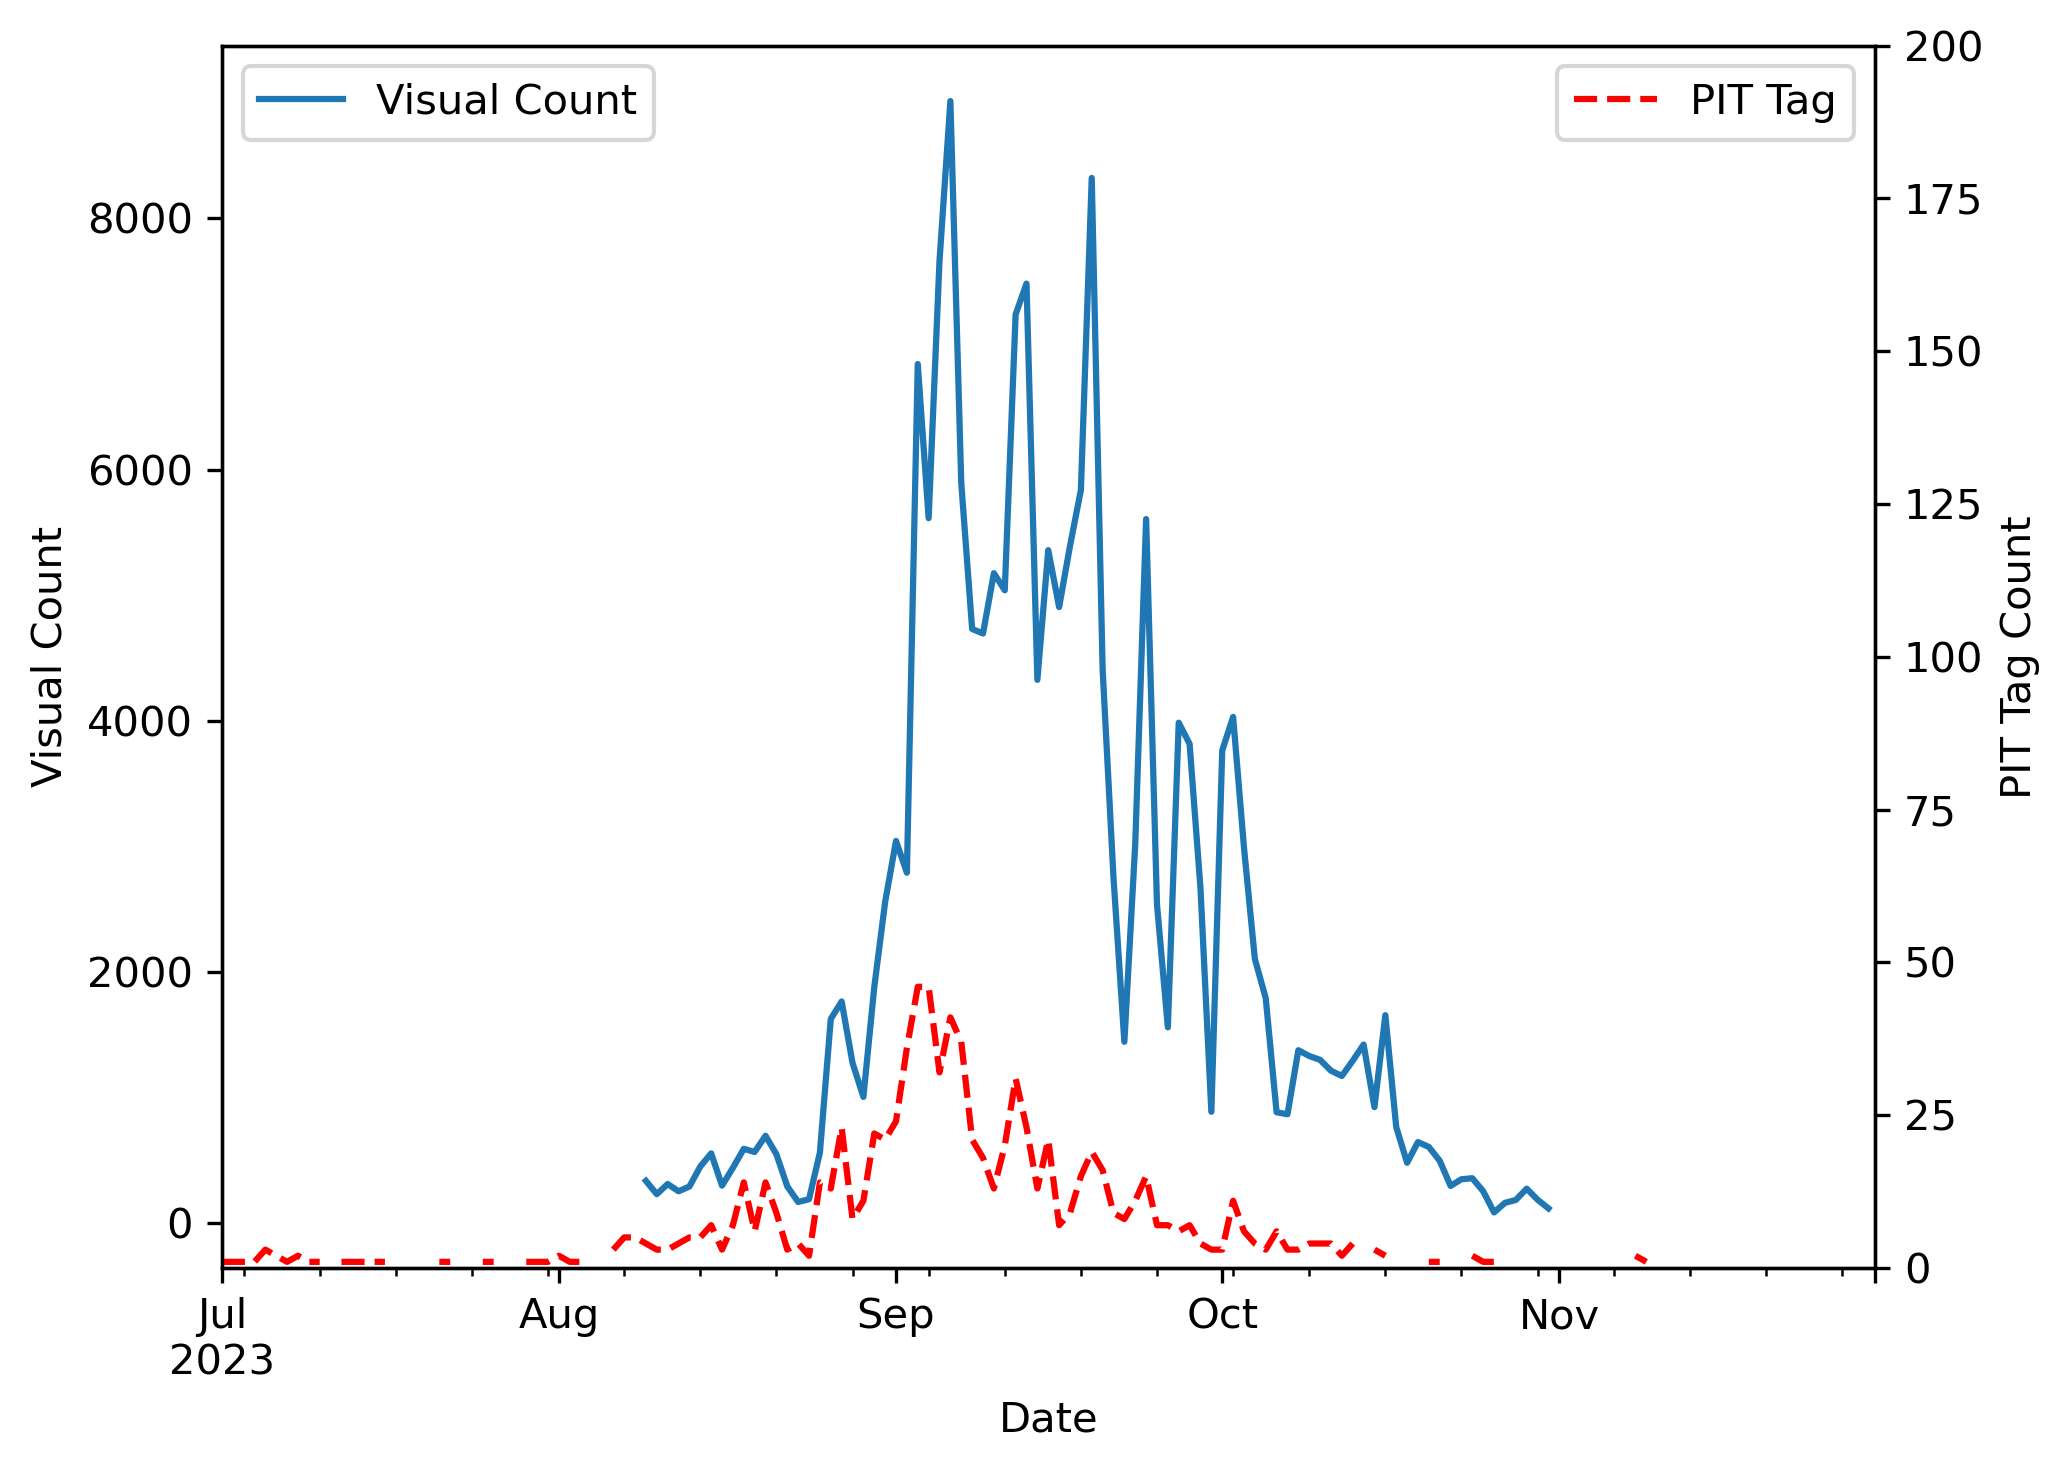

In [39]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
visual_count.plot(x="date", y="value", label="Visual Count", ax=ax)
ax.set_ylabel("Visual Count")
ax.legend(loc='upper left')
ax.set_xlim(pd.to_datetime("2023-07-01"), pd.to_datetime("2023-11-30"))
ax2 = ax.twinx()
pit_tag.plot(x="date", y="value", label="PIT Tag",c='red', ax=ax2, linestyle='--')
ax2.legend(loc='upper right')
ax2.set_ylim(0, 200)
ax2.set_ylabel("PIT Tag Count")
ax2.set_xlim(pd.to_datetime("2023-07-01"), pd.to_datetime("2023-11-30"))
ax.set_xlabel("Date")
fig.tight_layout()